<a href="https://colab.research.google.com/github/Usama-zia/Project-2/blob/main/project_2_Loading_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before Running the code please save this colab book to your google drive and then open it from there.

#Installing Libraries and Dependencies


In [ ]:

#Installing libraries and Dependencies
!pip install transformers
import numpy as np
import seaborn as sns
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import math
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from textwrap import wrap
from textblob import TextBlob

     |████████████████████████████████| 2.1MB 8.9MB/s 
     |████████████████████████████████| 3.3MB 33.8MB/s 
     |████████████████████████████████| 901kB 37.8MB/s 


#Cloning the Dataset from Github Repository(https://github.com/Usama-zia/Project-2)

In [ ]:
# remove dataset directory if already exists
!rm -rf project-2

# fetch dataset
!git clone https://github.com/Usama-zia/Project-2.git

fatal: destination path 'Project-2' already exists and is not an empty directory.


#Some Constant Used for Loading the Dataset

In [ ]:
#folders = [emotion, hate ,sentiment]
emotion = '/content/Project-2/datasets/emotion'
hate = '/content/Project-2/datasets/hate'
sentiment = '/content/Project-2/datasets/sentiment'
train_text = 'train_text.txt'
train_labels = 'train_labels.txt'
test_text = 'test_text.txt'
test_labels = 'test_labels.txt'
val_text = 'val_text.txt'
val_labels = 'val_labels.txt'
maps = 'mapping.txt'

#Function for Loading Datasets

In [ ]:
data_set=emotion #variable is declared outsids function so os.path.join does not through an error on compile
def load_data(data_set):
  #for loading train text and labels
  with open(os.path.join(data_set, train_text)) as f:
    train_data = pd.read_csv(f, sep="\n", header=None)
    with open(os.path.join(data_set,train_labels)) as f:
      train_data[1] = pd.read_csv(f, sep="\n", header=None)

  #for loading test text and labels
  with open(os.path.join(data_set, test_text)) as f:
    test_data = pd.read_csv(f, sep="\n", header=None)
    with open(os.path.join(data_set, test_labels)) as f:
      test_data[1] = pd.read_csv(f, sep="\n", header=None)

  #for loading val text and labels  
  with open(os.path.join(data_set, val_text)) as f:
    val_data=pd.read_csv(f, sep="\n", header=None)
    with open(os.path.join(data_set, val_labels)) as f:
      val_data[1]=pd.read_csv(f, sep="\n", header=None)

  #concatinating and mapping labels
  data_bits = [train_data,test_data,val_data]
  full_dataset = pd.concat(data_bits)
  full_dataset.columns=['tweets','label']
  return full_dataset

#Function for Mapping Labels to Numeric Values

In [ ]:
path = emotion#variable is declared outsids function so os.path.join does not through an error on compile
def mapping_labels(path,data):
  #for loding mapping for labels
  with open(os.path.join(path, maps)) as f:
    map_data= pd.read_csv(f, sep="\t", header=None)

  #mapping labels to their integer values in the dataset  
  mapping=dict(enumerate(map_data[1].values.tolist()))
  data['label'] = data.label.map(mapping)
  return data

#Function for preprocessing Datasets

In [ ]:

def preprocessing_data(data):
  print('============Before Preprocessing=============')

  for index,text in enumerate(data['tweets'][5:10]):
    print('tweet %d:\n'%(index+1),text)
  #removing punctuations
  data['tweets']=data['tweets'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
  #removing extra spaces
  data['tweets']=data['tweets'].apply(lambda x: re.sub(' +',' ',x))
  #removing @user
  data['tweets'] = data['tweets'].str.strip('user')

  #after Preprocessing
  print('============After Preprocessing=============')
  for index,text in enumerate(data['tweets'][5:10]):
    print('tweet %d:\n'%(index+1),text)
  return data

#Functions for EDA

In [ ]:
#EDA
def lem_data(data):
  # Loading model
  nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])
  # Lemmatization with stopwords removal
  data['tweets']=data['tweets'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
  return data

def doc_matrix(df_grouped):
  cv=CountVectorizer(analyzer='word')
  data=cv.fit_transform(df_grouped['tweets'])
  df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
  df_dtm.index=df_grouped.index
  return df_dtm
  
  # Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()

def plot_polarity(product_polarity_sorted):
  plt.figure(figsize=(10,8))
  plt.xlabel('Polarity')
  plt.ylabel('label')
  plt.title('Polarity of Different tweets belonging to Each label')
  polarity_graph=plt.barh(np.arange(len(product_polarity_sorted.index)),product_polarity_sorted['polarity'],color='green',)
  # Writing labels names on bar
  for bar,product in zip(polarity_graph,product_polarity_sorted.index):
    plt.text(0.005,bar.get_y()+bar.get_height()-0.5,'{}'.format(product),va='center',fontsize=12,color='black')

  # Writing polarity values on graph
  for bar,polarity in zip(polarity_graph,product_polarity_sorted['polarity']):
    plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
  plt.yticks([])
  plt.show()


#Loading and Preprocessing Emotion Dataset


In [ ]:
#load Dataset
emotion_dataset = load_data(emotion)
emotion_dataset = preprocessing_data(emotion_dataset)
emotion_dataset.head()
#for maping labels
emotion_dataset = mapping_labels(emotion,emotion_dataset)
emotion_dataset.head()


#EDA For Emotion Dataset

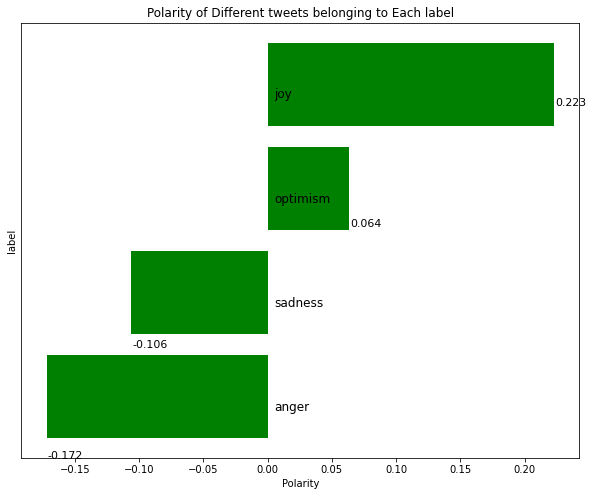

In [ ]:
#EDA
#lematizing dataset
emo_lemtizied = lem_data(emotion_dataset)

# to check for no of tweets belonging to each label\class
emo_polar = emo_lemtizied
emo_polar['polarity']=emo_polar['tweets'].apply(lambda x:TextBlob(x).sentiment.polarity)

#plotting 
product_polarity_sorted=pd.DataFrame(emo_polar.groupby('label')['polarity'].mean().sort_values(ascending=True))
plot_polarity(product_polarity_sorted)

#print("3 Random Reviews with Highest Polarity:")
#for index,review in enumerate(emo_polar.iloc[emo_polar['polarity'].sort_values(ascending=False)[:3].index]['tweets']):
  #print('Review {}:\n'.format(index+1),review)
#plotting p



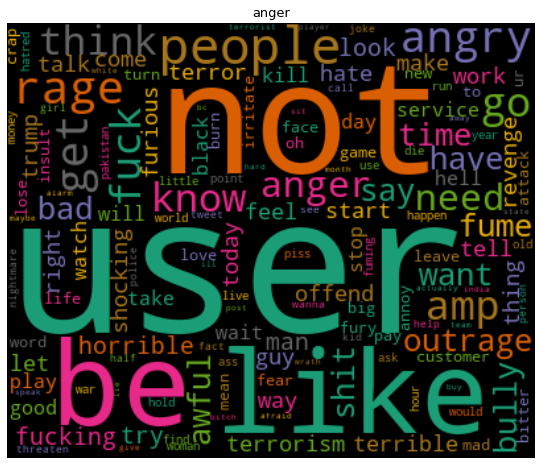

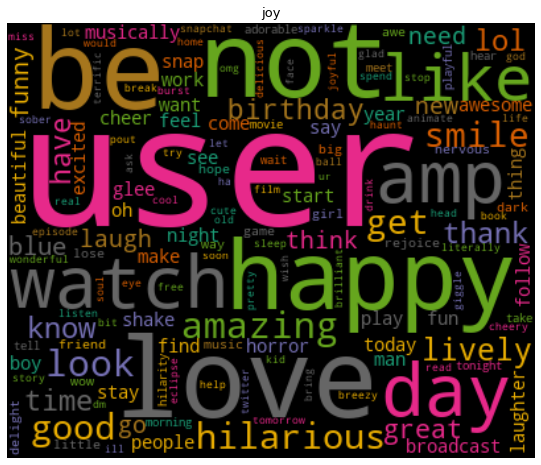

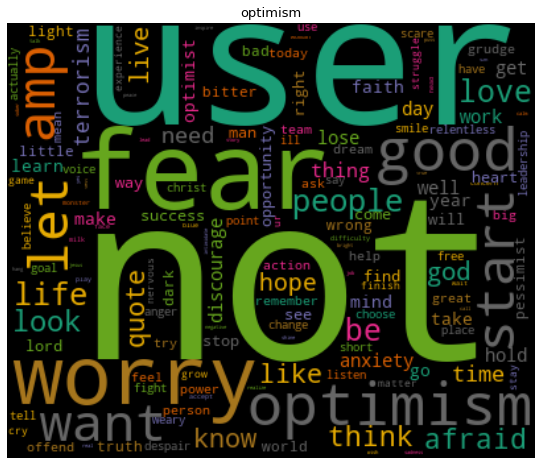

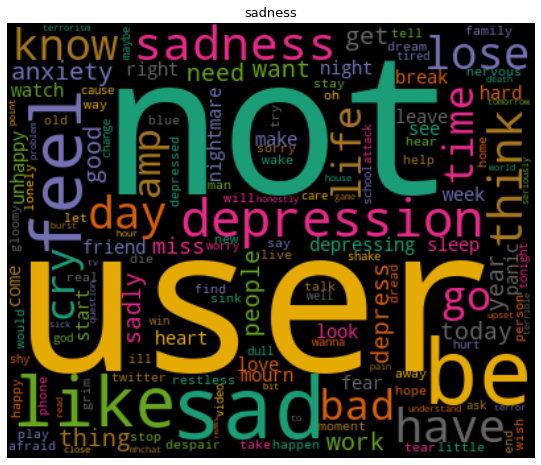

In [ ]:
# Creating Document Term Matrix 
df_grouped=emo_lemtizied[['tweets','label']].groupby(by='label').agg(lambda x:' '.join(x))
doc_matrid = doc_matrix(df_grouped)
doc_matrid=doc_matrid.transpose()
for index,label in enumerate(doc_matrid.columns):
  generate_wordcloud(doc_matrid[label].sort_values(ascending=True),label)

#Loading and Preprocessing hate Dataset

In [ ]:
#load Dataset
hate_dataset = load_data(hate)
hate_dataset = preprocessing_data(hate_dataset)
hate_dataset.head()
#for maping labels
hate_dataset = mapping_labels(hate,hate_dataset)
hate_dataset.head()

============Before Preprocessing=============
tweet 1:
 Me flirting- So tell me about your father... 
tweet 2:
 The Philippine Catholic bishops' work for migrant workers should focus on families who are "paying the great... 
tweet 3:
 I AM NOT GOING AFTER YOUR EX BF YOU LIEING SACK OF SHIT ! I'm done with you dude that's why I dumped your ass cause your a lieing 😂😡 bitch 
tweet 4:
 When cuffin season is finally over 
tweet 5:
 Send home migrants not in need of protection, Peter Dutton tells UN, HEY DUTTON HOW ABOUT THE ONES THAT HAVE STAYED AND NOT LEFT THE COUNTRY WHEN THEY SHOULD OVERSTAYERS ? WHY DONT YOU GO AND ROUND ALL THEM UP ?  
============After Preprocessing=============
tweet 1:
 Me flirting So tell me about your father 
tweet 2:
 The Philippine Catholic bishops work for migrant workers should focus on families who are paying the great 
tweet 3:
 I AM NOT GOING AFTER YOUR EX BF YOU LIEING SACK OF SHIT Im done with you dude thats why I dumped your ass cause your a lieing 😂😡 b

,tweets,label
0,nice new signage Are you not concerned by Bea...,not-hate
1,A woman who you fucked multiple times saying y...,hate
2,user real talk do you have eyes or were they ...,hate
3,your girlfriend lookin at me like a groupie in...,hate
4,Hysterical woman like user,not-hate


#EDA For hate Dataset

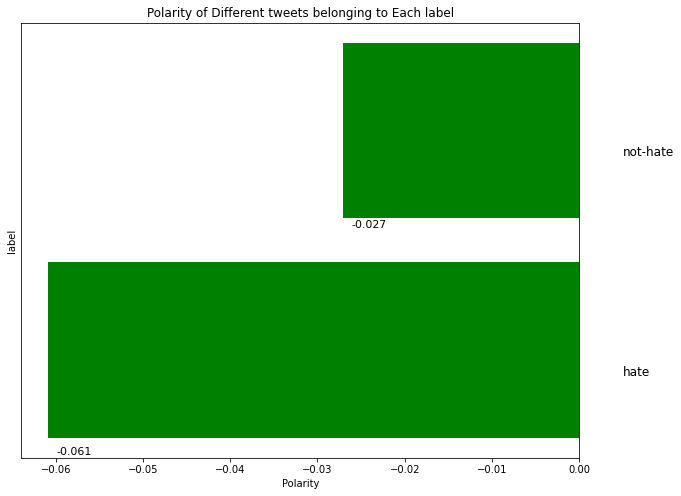

In [ ]:
#EDA
#lematizing dataset
hate_lemtizied = lem_data(hate_dataset)

# to check for no of tweets belonging to each label\class
hate_polar = hate_lemtizied
hate_polar['polarity']=hate_polar['tweets'].apply(lambda x:TextBlob(x).sentiment.polarity)

#plotting 
product_polarity_sorted=pd.DataFrame(hate_polar.groupby('label')['polarity'].mean().sort_values(ascending=True))
plot_polarity(product_polarity_sorted)

#print("3 Random Reviews with Highest Polarity:")
#for index,review in enumerate(hate_polar.iloc[hate_polar['polarity'].sort_values(ascending=False)[:3].index]['tweets']):
  #print('Review {}:\n'.format(index+1),review)
#plotting p



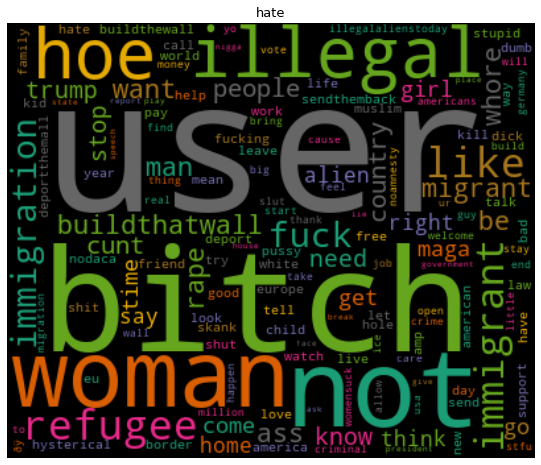

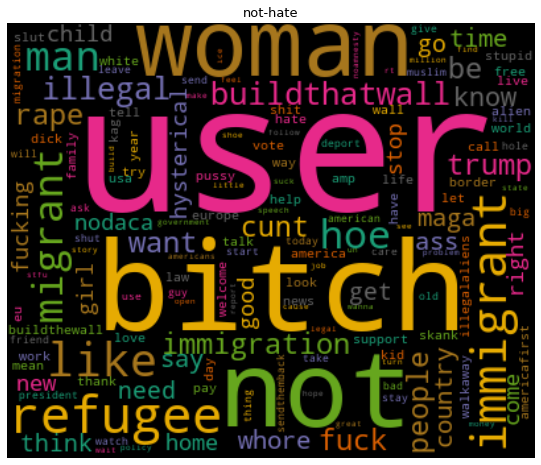

In [ ]:
# Creating Document Term Matrix 
df_grouped=hate_lemtizied[['tweets','label']].groupby(by='label').agg(lambda x:' '.join(x))
doc_matrid = doc_matrix(df_grouped)
doc_matrid=doc_matrid.transpose()
for index,label in enumerate(doc_matrid.columns):
  generate_wordcloud(doc_matrid[label].sort_values(ascending=True),label)

#Loading and Preprocessing Sentiment Dataset



In [ ]:
#load Dataset
sentiment_dataset = load_data(sentiment)
sentiment_dataset = preprocessing_data(sentiment_dataset)
sentiment_dataset.head()
#for maping labels
sentiment_dataset = mapping_labels(sentiment,sentiment_dataset)
sentiment_dataset.head()

============Before Preprocessing=============
tweet 1:
 @user LIT MY MUM 'Kerry the louboutins I wonder how many Willam owns!!! Look Kerry Warner Wednesday!' 
tweet 2:
 \"" SOUL TRAIN\"" OCT 27 HALLOWEEN SPECIAL ft T.dot FINEST rocking the mic...CRAZY CACTUS NIGHT CLUB ..ADV ticket $10 wt out costume $15... 
tweet 3:
 So disappointed in wwe summerslam! I want to see john cena wins his 16th title 
tweet 4:
 This is the last Sunday w/o football .....,NFL is back baby 
tweet 5:
 @user @user CENA & AJ sitting in a tree K-I-S-S-I-N-G 1st goes AJ's  job then John's cred then goes Vicki with the GM position. 
============After Preprocessing=============
tweet 1:
  LIT MY MUM Kerry the louboutins I wonder how many Willam owns Look Kerry Warner Wednesday 
tweet 2:
  SOUL TRAIN OCT 27 HALLOWEEN SPECIAL ft Tdot FINEST rocking the micCRAZY CACTUS NIGHT CLUB ADV ticket 10 wt out costume 15 
tweet 3:
 So disappointed in wwe summerslam I want to see john cena wins his 16th title 
tweet 4:
 This is th

,tweets,label
0,QT user In the original draft of the 7th book ...,positive
1,Ben Smith Smith concussion remains out of the ...,neutral
2,Sorry bout the stream last night I crashed out...,neutral
3,Chase Headleys RBI double in the 8th inning of...,neutral
4,Alciato Bee will invest 150 million in Januar...,positive


#EDA For Sentiment Dataset

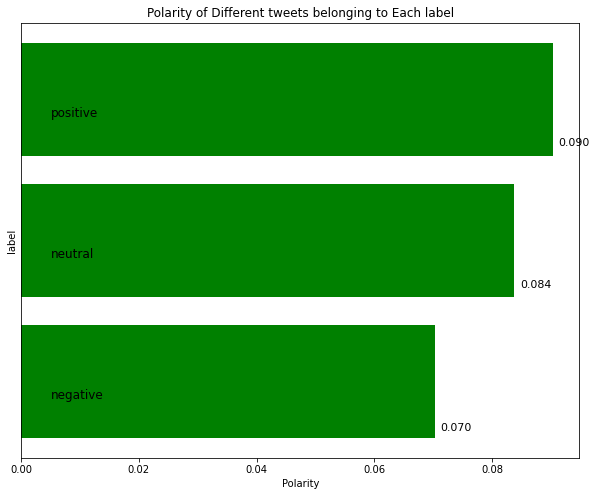

In [ ]:
#EDA
#lematizing dataset
sentiment_lemtizied = lem_data(sentiment_dataset)

# to check for no of tweets belonging to each label\class
sentiment_polar = sentiment_lemtizied
sentiment_polar['polarity']=sentiment_polar['tweets'].apply(lambda x:TextBlob(x).sentiment.polarity)

#plotting 
product_polarity_sorted=pd.DataFrame(sentiment_polar.groupby('label')['polarity'].mean().sort_values(ascending=True))
plot_polarity(product_polarity_sorted)

#print("3 Random Reviews with Highest Polarity:")
#for index,review in enumerate(sentiment_polar.iloc[sentiment_polar['polarity'].sort_values(ascending=False)[:3].index]['tweets']):
  #print('Review {}:\n'.format(index+1),review)
#plotting p



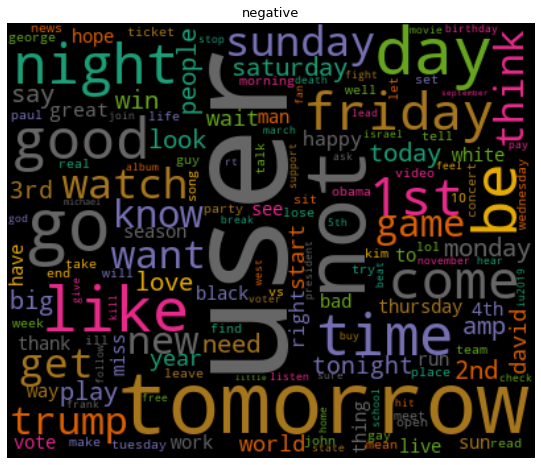

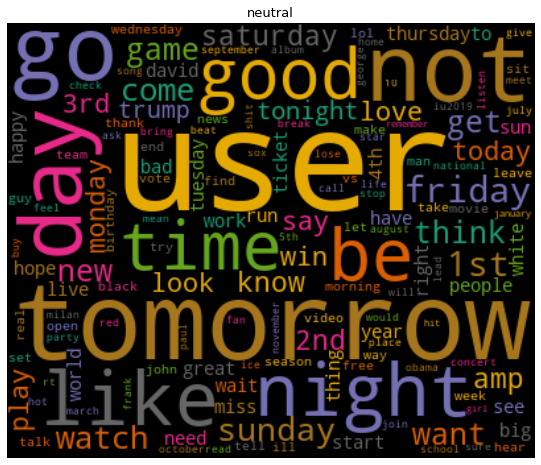

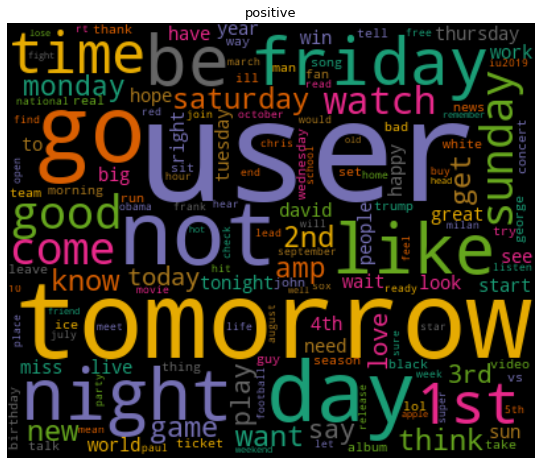

In [ ]:
# Creating Document Term Matrix 
df_grouped=sentiment_lemtizied[['tweets','label']].groupby(by='label').agg(lambda x:' '.join(x))
doc_matrid = doc_matrix(df_grouped)
doc_matrid=doc_matrid.transpose()
for index,label in enumerate(doc_matrid.columns):
  generate_wordcloud(doc_matrid[label].sort_values(ascending=True),label)